
# Project: Investigate a Dataset (TMDb Movies Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> ### Overview
>
> To complete my Data Analysis project I will be using the TMDb movie dataset.
>
> This dataset contains information about 10 thousand movies including user ratings and revenue, this dataset collected from The Movie Database (TMDb). It consist of 21 columns such as imdb_id, revenue, budget, vote_count etc.


 
>### Questions:
>1. Movies which had most and least budgets
>2. Movies with most and least earned revenue
>3. Movies which had most and least profit
>4. Movies with the longest and shortest runtime
>5. Average runtime of the movies
>6. In which year we had most no.of profitable movies
>7. Characteristics of profitable movies
>
>      For this question I will explore the following        properties of the movies with respect to the profitable movies:
>
>  -  Succesful Genres.
>
>  -  Average Budget of the movies.
>
>  -  Average Revenue earned by the movies
>
>  -  Average duration of the movies
>
>  -  Most Frequent Cast  

In [202]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

<a id='wrangling'></a>
## Data Wrangling

> After loading the datset, I will use Pandas to explore some helpful methods for assessing and building intuition about the dataset, then I will proceed with the cleaning process to include only the relavent data related to the questions I will apply on the dataset for the analysis process and delete the unused data.


### General Properties

>### Loading the dataset

In [203]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#loading the csv file and storing it in 'df'
df = pd.read_csv('tmdb-movies.csv')

#printing first five rows
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [204]:
#printing the last three rows
df.tail(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [205]:
#The dimensions of the dataset
df.shape

(10866, 21)

> ### check for cleanliness

In [206]:
# this will display a concise summary of the dataframe,
# including the number of non-null values in each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [207]:
# check for duplicates in the data
sum(df.duplicated())

1

In [208]:
# although the datatype for release_date appears to be object in Pandas, further
# investigation shows it's a string

type(df['release_date'][0])

str

> ### Obsevations from the data set
>
>1.) No unit of currency is mentioned in the dataset. So for my analysis I will cosider it in US dollar as it is the most used international currency.
>
>2.) vote_count is different for all the movies, so we cannot directly conculed the popularity of the movies based on the average vote count


### Data Cleaning (Removing the unused information from the dataset)

>
>1. Remove unnecessary columns such as 'id', 'imdb_id',  'popularity', 'budget_adj', 'revenue_adj', 'homepage',  production_company, 'keywords', 'overview', 'production_companies', 'vote_count'  and 'vote_average'.
>2. Changing release date column from string to date format.
>3. Removing the duplicated values.
>4. Replacing zero with NAN in runtime column.
>5. replace all the values from '0' to NAN in 'budget' and  'revenue' columns, then removing them.
>6. Changing format of budget and revenue columns.

### 1. Removing unused columns
Just to confirm these columns I want to delet are just irrelevant to my process to investage this dataset, the columns I'm going to delete:    id, imdb_id, popularity, budget_adj, revenue_adj, homepage, keywords, overview, production_companies, vote_count and vote_average: 

In [209]:
# a list of columns we want to remove
del_col = [ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']
#deleting the columns from the database
df = df.drop(del_col, 1)

# previewing the new dataset
df.head(3)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015


### 2. Changing the release date column into standard date format

In [210]:
df.release_date = pd.to_datetime(df['release_date'])

In [211]:
# checkeing the changed date column in the dataset
df.head(3)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015


### 3. Removing the duplicated values

In [212]:
df.drop_duplicates(keep ='first', inplace=True)

In [213]:
rows, col = df.shape

print('There are now {} total entries in our dataset after removing the duplicates.'.format(rows-1, col))

There are now 10864 total entries in our dataset after removing the duplicates.


###  4. Replacing zero with NAN in runtime column.


In [214]:
#replacing 0 with NaN of runtime column in the dataset
df['runtime'] =df['runtime'].replace(0, np.NAN)

###  5.Removing (0) from budget and revenue columns
After exploring the first and last few rows in budget and revenue columns, there are several entries have '0' value, so firstly I will convert those values to NAN then I will remove them from the dataset.

In [215]:
# creating a list of revenue and budget columns
temp_list=['budget', 'revenue']

#this will replace all the value from '0' to NAN in the list
df[temp_list] = df[temp_list].replace(0, np.NAN)

#Removing all the row which has NaN value in temp_list 
df.dropna(subset = temp_list, inplace = True)

rows, col = df.shape
print('Now we have only {} no.of movies.'.format(rows-1))


Now we have only 3853 no.of movies.


### 6. Changing format of budget and revenue columns
earlier when we I checked the data information summary of the dataset columns each of budget and revenue columns were float data types.

In [216]:
change_type=['budget', 'revenue']

#changing data type
df[change_type]=df[change_type].applymap(np.int64)

#printing data types of the dataset to see the changed information
df.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                  float64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

*****

<a id='eda'></a>
## Exploratory Data Analysis





### Research Question 1 : Movies which had most and least budgets


In [217]:
import pprint
#defining the function
def calculate(column):
    #for highest value
    high= df[column].idxmax()
    high_details=pd.DataFrame(df.loc[high])
    
    #for lowest value
    low= df[column].idxmin()
    low_details=pd.DataFrame(df.loc[low])
    
    #collecting data in one place
    info=pd.concat([high_details, low_details], axis=1)
    
    return info

#calling the function
calculate('budget')


,2244,2618
budget,425000000,1
revenue,11087569,100
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00
release_year,2010,1999


> The entery with id number 2244 shows the largest budget with total of 425000000 dollar.
>
> Whereas the entery with id no. 2618 have the lowest budget with total of 1 dollar. 

### Research Question 2 : Movies with most and least earned revenue

In [218]:
# I will call the same function **calculate(column)** again for this analysis
calculate('revenue')

,1386,5067
budget,237000000,6000000
revenue,2781505847,2
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
tagline,Enter the World of Pandora.,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00
release_year,2009,2003


> Avater Movie with id no. 1386 shows the largest revenue earned i.e 2781505847 dollar.
>
>Whereas Shattered Glass Movie with id no. 5067 shows the smallest revenue earned i.e 2 dollar

### Research Question 3 : Movies which had most and least profit
We don't have a column represents the total profits of the movies in our dataset to find the most and least profit movies so I will answer this question in two steps:

#### A. Calculating the profit of each movie
I'm going to add a new column to the dataset represents the total profit every movie in our dataset made by subtracting the revenue from the budget.

In [219]:
#insert function with three parameters(index of the column in the dataset, name of the column, value to be inserted)
df.insert(2,'profit',df['revenue']-df['budget'])

#previewing the changes in the dataset
df.head(2)

,budget,revenue,profit,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015


#### B. Movies with most and least profit¶

In [220]:
# we will call the same function **calculate(column)** again for this analysis
calculate('profit')

,1386,2244
budget,237000000,425000000
revenue,2781505847,11087569
profit,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


> Movie with id 1386 shows the highest earned profit i.e 2544505847.
>
> Whereas the movie with id 2244 shows the lowest earned profit i.e -413912431

### Research Question 4 : Movies with longest and shortest runtime

In [221]:
# we will call the same function **calculate(column)** again for this analysis
calculate('runtime')

,2107,5162
budget,18000000,10
revenue,871279,5
profit,-17128721,-5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
tagline,The man who hijacked the world,NaN
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00


> The movie with id 2107 shows the longest runtime or duration about 338 minutes.
>
> Whereas the movie with id 5162 shows the shortest runtime about 15 minutes.

### Research Question 5 : Average runtime of the movies

In [222]:
# defining a function to find average of a column
def avg_fun(column):
    return df[column].mean()

In [223]:
#calling above function
avg_fun('runtime')

109.22029060716139

> The average runtime of a movie is 109 minutes. Now I'll analyse this value from a visual perspective.

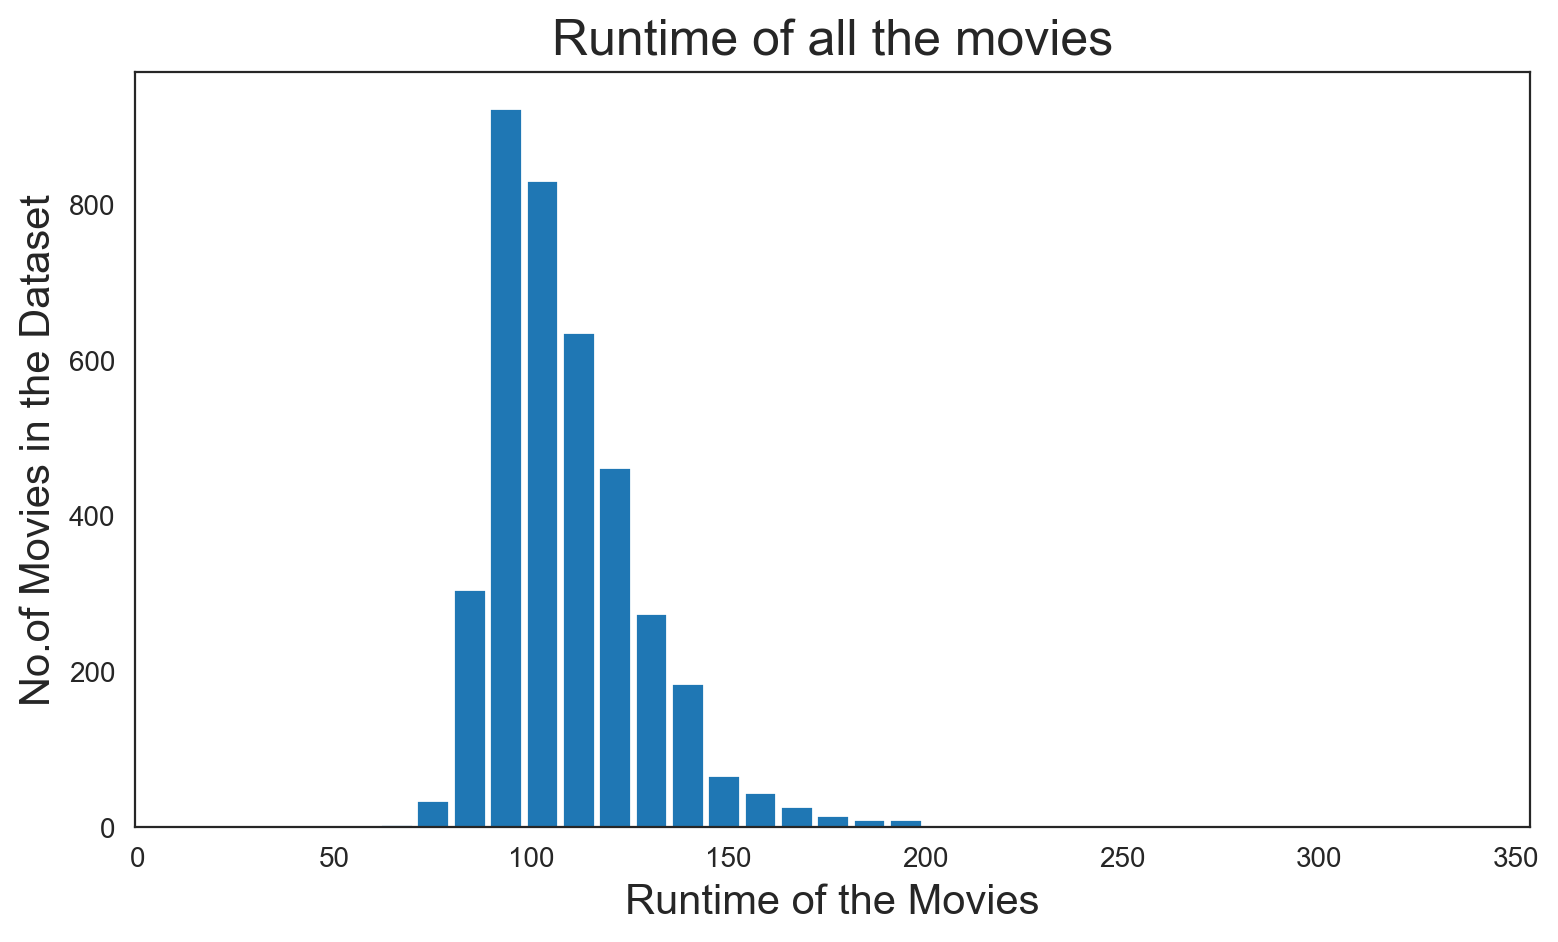

In [224]:
#plotting a histogram of runtime of movies

#giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

#On x-axis 
plt.xlabel('Runtime of the Movies', fontsize = 15)
#On y-axis 
plt.ylabel('No.of Movies in the Dataset', fontsize=15)
#Name of the graph
plt.title('Runtime of all the movies', fontsize=18)

#giving a histogram plot
plt.hist(df['runtime'], rwidth = 0.9, bins =35)
#displays the plot
plt.show()

> The distribution of the above graph is positively or right skewed! Most of the movies duarations arrange from 80 to 115 minutes. Almost 1000 and more no.of movies fall in this criteria.

**Lets take another look at runtime of the movie using different kind of plots i.e Box Plot and Data Point Plot**

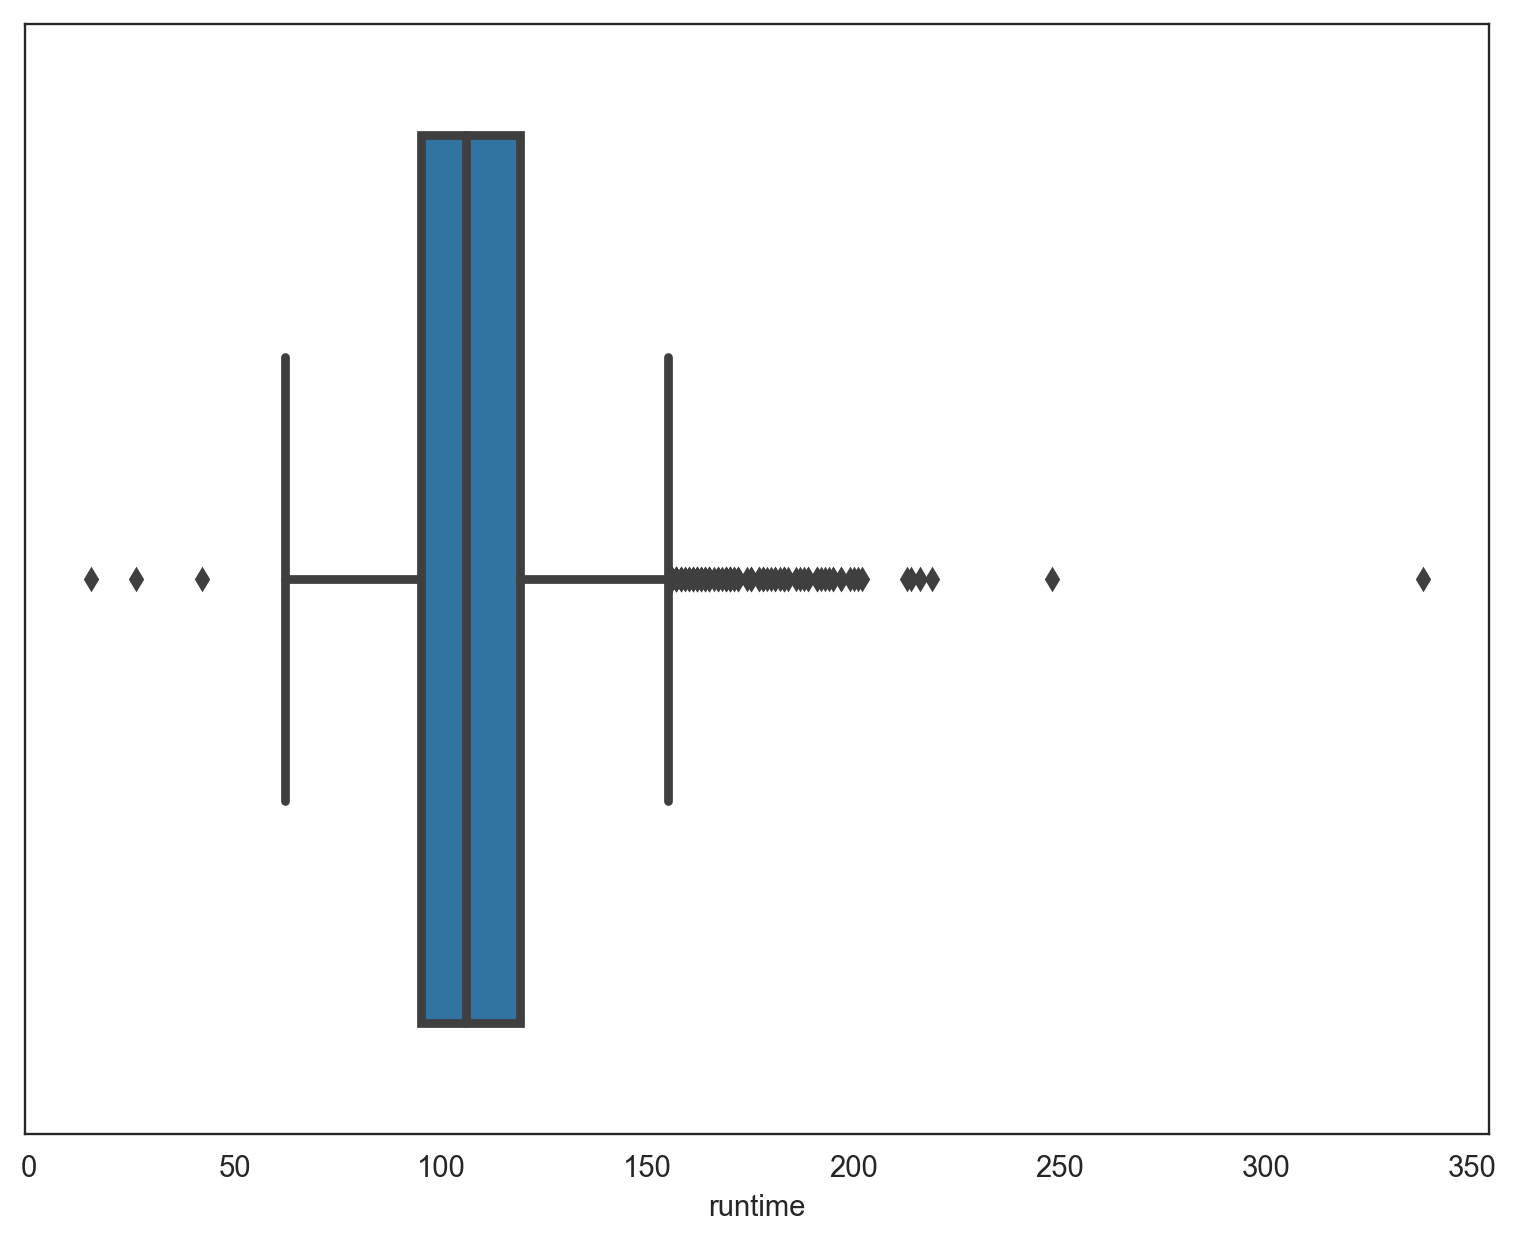

In [225]:
import seaborn as sns
#The First plot is box plot of the runtime of the movies 
plt.figure(figsize=(9,7), dpi = 105)

#using seaborn to generate the boxplot
sns.boxplot(df['runtime'], linewidth = 3)
#diplaying the plot
plt.show()

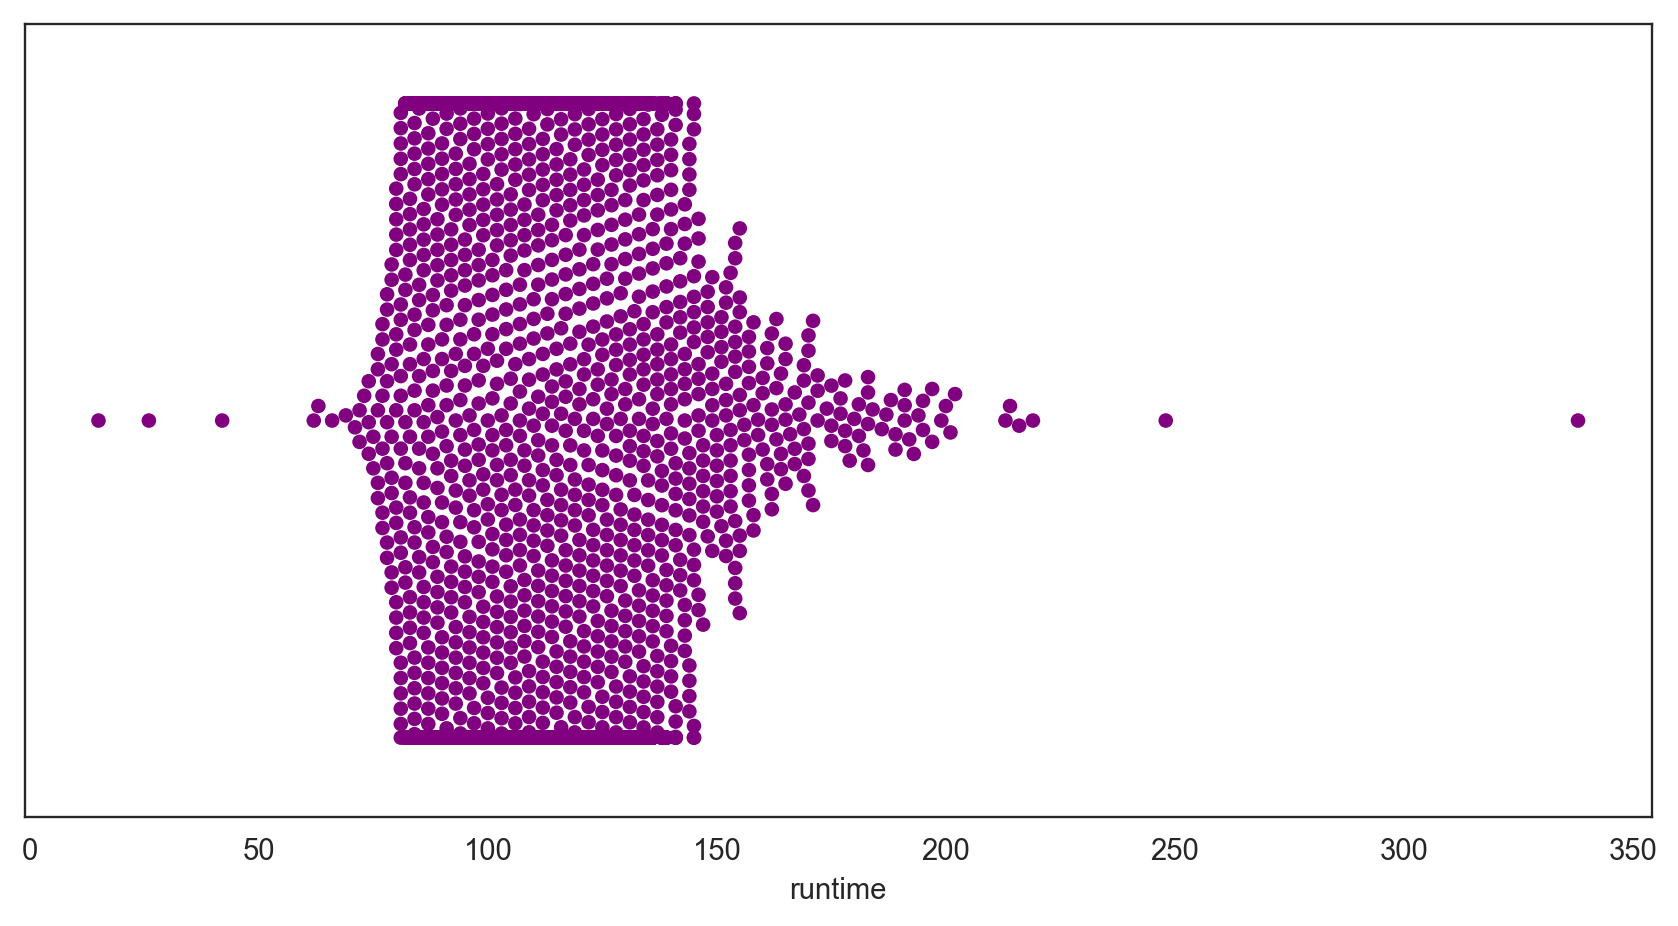

In [226]:
#The Second plot is the data points plot of runtime of movies

plt.figure(figsize=(10,5), dpi = 105)
#using seaborn to generate the plot
sns.swarmplot(df['runtime'], color = 'purple')
#displaying the plot
plt.show()

In [228]:
#getting specific runtime 
df['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

>The above first plot, the box-plot gives us an overall idea of how spreaded the ditribution is in case of runtime of the movies. It also shows the outliers here.
>
>The second plot "Data Point Plot" generated above gives a visual of the distribution of runtime of movies by plotting the points againts their respective positions in the ditribution.
>
>By looking at both of the plots and calculations, we can conclude that:
>
>1. 25% of the movies have a runtime of less than 95 minutes
>2. 50% (median) of movies have a runtime of less than 109 minutes. 
>3. 75% of movies have a runtime of less than 119 minutes

### Research Question 6 : In which year we had most no.of profitable movies.

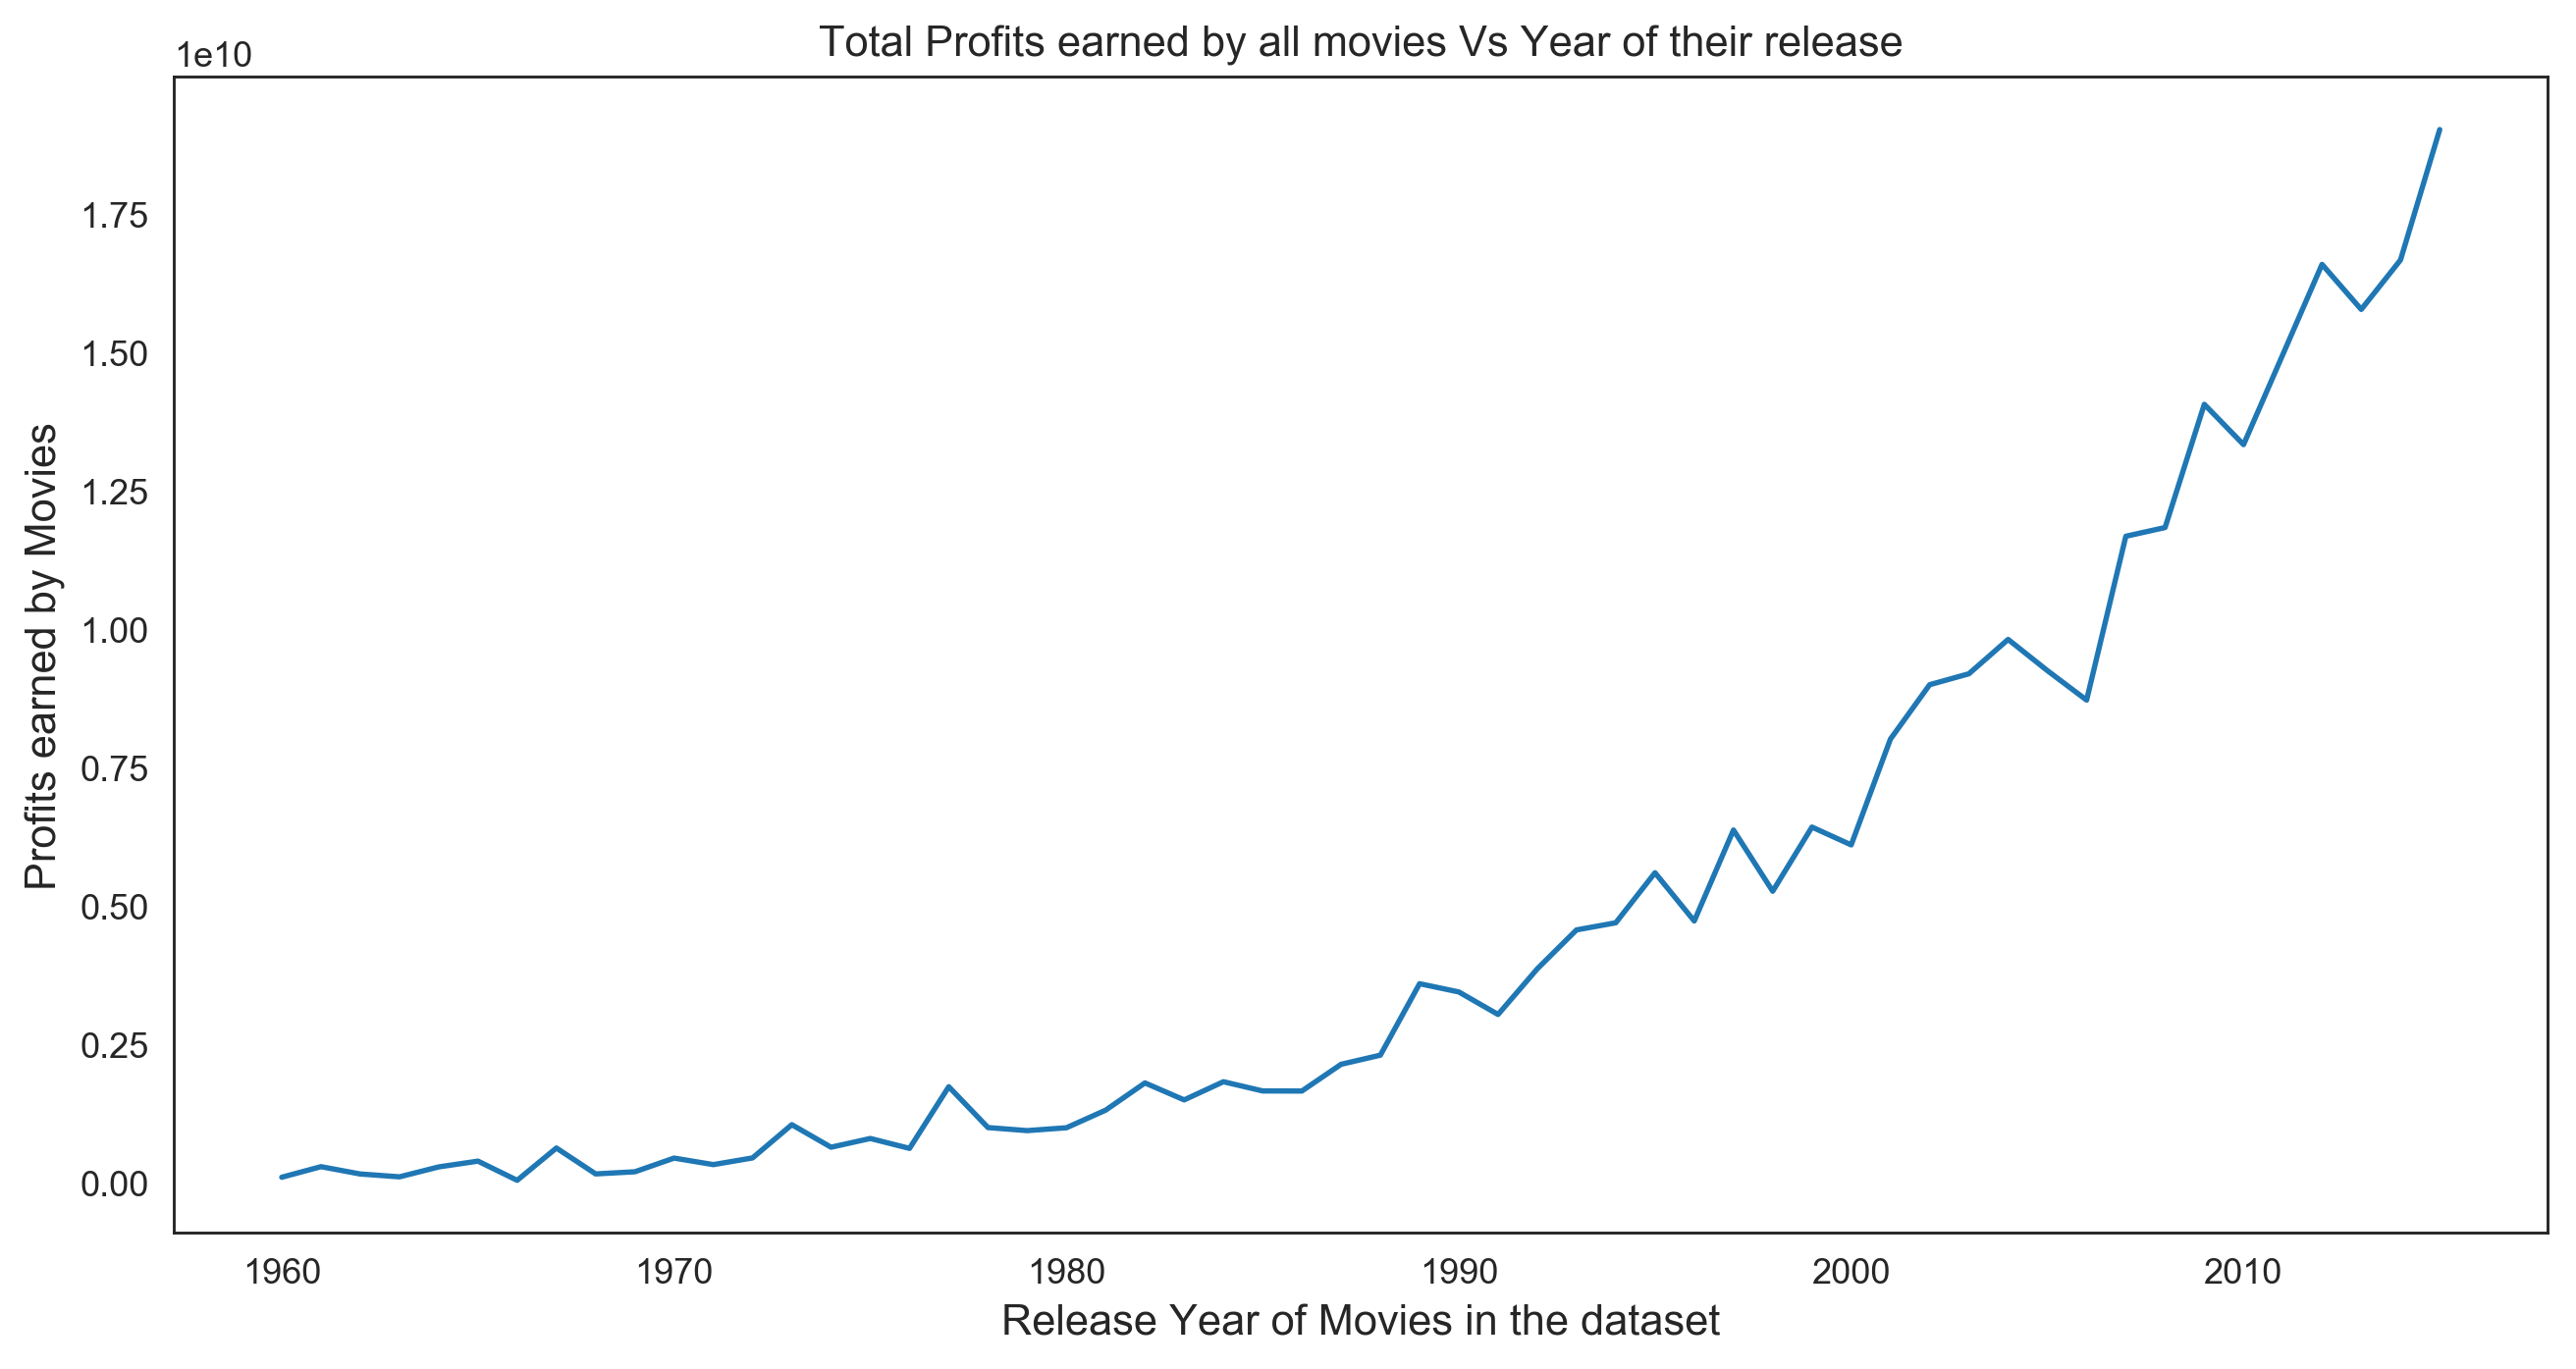

In [229]:
#We will be using Line plot for this analysis
#Since we want to know the profits of movies for every year therefore we have to sum up all the movies of a particular year

profits_year = df.groupby('release_year')['profit'].sum()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('Release Year of Movies in the dataset', fontsize = 12)
#on y-axis
plt.ylabel('Profits earned by Movies', fontsize = 12)
#title of the line plot
plt.title('Total Profits earned by all movies Vs Year of their release')

#plotting the graph
plt.plot(profits_year)

#displaying the line plot
plt.show()

In [230]:
#To find that which year made the highest profit?
profits_year.idxmax()

2015

>So we can conclude both graphically as well as by calculations that year 2015 was the year where movies made the highest profit.

### Research Question 7 :With respect to the profitable movies
> We will now find characteristics of profitable movies, Before moving further we need to clean our data again. We will be considering only those movies who have earned a significant amount of profit.
>
 **So lets fix this amount by selecting the movies having profit of $50M or more :**

In [231]:
#selecting the movies having profit of $50M or more
profit_data = df[df['profit'] >= 50000000]

#reindexing new data
profit_data.index = range(len(profit_data))

#we will start from 1 instead of 0
profit_data.index = profit_data.index + 1

#printing the changed dataset
profit_data.head(3)

,budget,revenue,profit,original_title,cast,director,tagline,runtime,genres,release_date,release_year
1,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
2,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
3,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2015


In [232]:
#counting the no.of rows in the new data base
len(profit_data)

1338

> So our dataset is reduced to 1338 rows from 3853 (in earlier case).

> ### <font color=purple> A. Succesful Genres</font>

In [233]:
#function which will take any column as argument from and keep its track 
def data(column):
    #will take a column, and separate the string by '|'
    data = profit_data[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data = pd.Series(data.split('|'))
    
    #arranging in descending order
    count = data.value_counts(ascending = False)
    
    return count

In [234]:
#variable to store the retured value
count = data('genres')
#printing top 5 values
count.head()

Comedy       492
Drama        481
Action       464
Thriller     405
Adventure    379
dtype: int64

**Here's a graphical analysis of the above collected data**

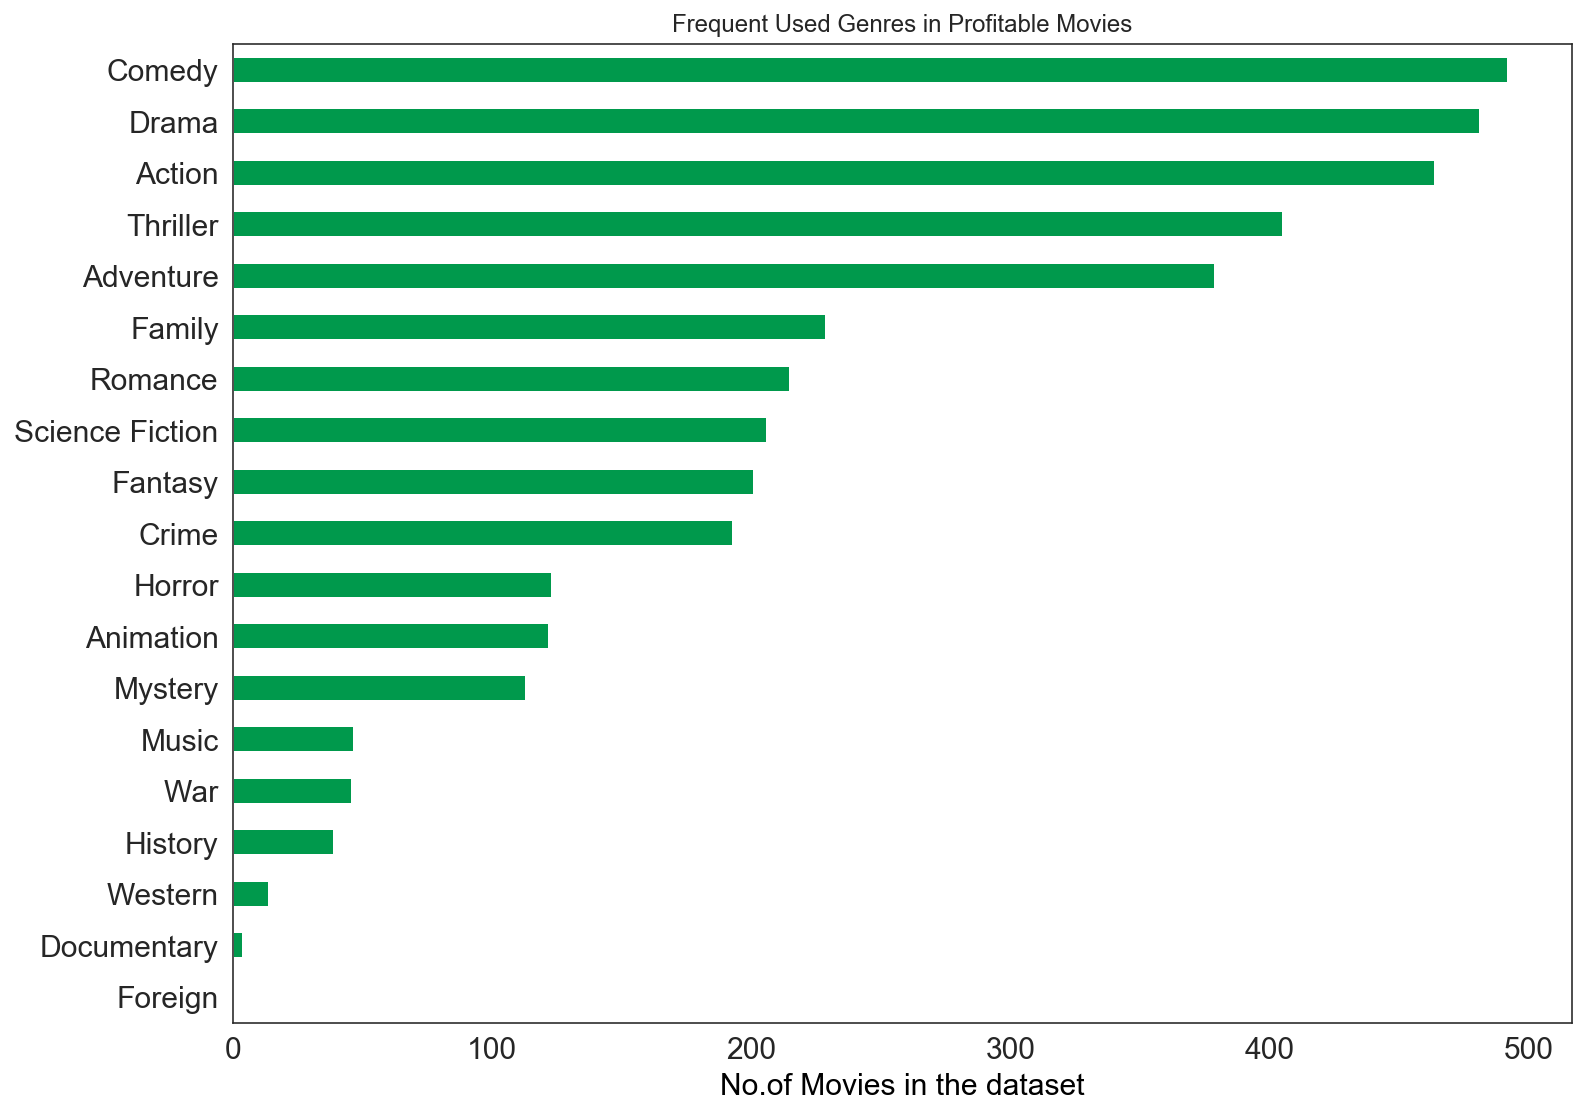

In [235]:
#lets plot the points in descending order top to bottom as we have data in same format.
count.sort_values(ascending = True, inplace = True)

#ploting
pt = count.plot.barh(color = '#00994C', fontsize = 15)

#title
pt.set(title = 'Frequent Used Genres in Profitable Movies')

# on x axis
pt.set_xlabel('No.of Movies in the dataset', color = 'black', fontsize = '15')

#figure size(width, height)
pt.figure.set_size_inches(12, 9)

#ploting the graph
plt.show()

The visualization above shows Frequent Used Genres in Profitable Movies from number of all movies.

> ### <font color=purple> B. Average Budget of the movies</font>

In [236]:
#New function to find average 
def profit_avg(column):
    return profit_data[column].mean()

In [237]:
# calling the above function for budget
profit_avg('budget')

60444957.76083707

> So the movies having profit of 50 million dollar and more have an average budget of 60 million dollar.

> ### <font color=purple> C. Average Revenue earned by the movies</font>

In [238]:
# calling the above function for revenue
profit_avg('revenue')

254957662.59491777

> So the movies having profit of 50 million dollar and more have an average revenue of 255 million dollar.



> ### <font color=purple> D. Average duration of the movies</font>

In [239]:
# calling the above function for runtime
profit_avg('runtime')

113.66741405082212

> So the movies having profit of 50 million dollar and more have an average duration of 113 minutes.



> ### <font color=purple> E. Most Frequent Cast</font>
We will call the previous function **data(column)** again for this analysis.



In [240]:
#variable to store the retured value
count = data('cast')
#printing top 5 values
count.head()

Tom Cruise            27
Brad Pitt             25
Tom Hanks             22
Sylvester Stallone    21
Cameron Diaz          20
dtype: int64

>Tom Cruise is on the top for appearing the most in movies profiting more than $50M with total of 27 cast followed by Brad Pitt with 25 and Tom Hanks with 22.

****

<a id='conclusions'></a>
## Conclusions


> After this intersting analysis for TMDb dataset and abstract conclusions after each analysis or visualtion step here are some final thoughts:
> 
>**For a Movie in order to be considered in a successful criteria**
>
>-  Average Budget must be around 60 millon dollar.
>-  Average duration of the movie must be 113 minutes.
>-  Any one of these actors should be in the cast :Tom Cruise, Brad Pitt, Tom Hanks, Sylvester Stallone,Cameron Diaz.
>-  Genre must be : Action, Adventure, Thriller, Comedy, Drama.
>
>-  By doing all this the movie might be one of the hits and hence can earn an average revenue of around 255 million dollar.
>
>Final observation: This analysis was done considering the movies which had a significant amount of profit of around 50 million dollar. This might not be completely error free but by following these suggestions one can increase the probability of a movie to become a hit. Moreover we are not sure if the data provided to us is completely correct and up-to-date. As mentioned before the budget and revenue column do not have currency unit, it might be possible different movies have budget in different currency according to the country they are produce in. So an inconsistency appears here which can state the complete analysis wrong. Dropping the rows with missing values also affected the overall analysis.